<a href="https://colab.research.google.com/github/jamitan-235/fraud_detaction_using_ML/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Steps:**
1.   Check datatype ,describe dataset
2.  Data visualization
3. Label Encoding(convert category to numerical value)
4. Check Multicollinearty and Remove
5. Run model & Performance matrix
6.  Comparative analysis
7.   Sampling
1.  Comparative analysis
9.interface


---



## 1. Check datatype ,describe dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/thesis/PS_20174392719_1491204439457_log.csv'
#file_path = '/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'
#file_path='/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(file_path)
data.shape

(6362620, 11)

In [ ]:

data = data.sample(n=500000, random_state=42)

# Check the new size of the sampled dataset
print(data.shape)

(500000, 11)


In [ ]:
"""
# Separate fraud and non-fraud cases
fraud_data = data[data['isFraud'] == 1]
real_data = data[data['isFraud'] == 0]

# Calculate the number of samples needed for 60% fraud and 40% real
n_fraud = 8000
n_real = 42000

# Randomly sample fraud and real data
fraud_sample = fraud_data.sample(n=n_fraud, random_state=42)
real_sample = real_data.sample(n=n_real, random_state=42)

# Combine fraud and real samples into one dataset
data = pd.concat([fraud_sample, real_sample])

# Shuffle the dataset to mix the fraud and real cases
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new size and distribution of the sampled dataset
print(data.shape)
print(data['isFraud'].value_counts(normalize=True))  # Check the proportion of fraud and real cases
"""

"\n# Separate fraud and non-fraud cases\nfraud_data = data[data['isFraud'] == 1]\nreal_data = data[data['isFraud'] == 0]\n\n# Calculate the number of samples needed for 60% fraud and 40% real\nn_fraud = 8000\nn_real = 42000\n\n# Randomly sample fraud and real data\nfraud_sample = fraud_data.sample(n=n_fraud, random_state=42)\nreal_sample = real_data.sample(n=n_real, random_state=42)\n\n# Combine fraud and real samples into one dataset\ndata = pd.concat([fraud_sample, real_sample])\n\n# Shuffle the dataset to mix the fraud and real cases\ndata = data.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# Check the new size and distribution of the sampled dataset\nprint(data.shape)\nprint(data['isFraud'].value_counts(normalize=True))  # Check the proportion of fraud and real cases\n"

In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
3494160,259,PAYMENT,915.13,C2002954533,0.00,0.00,M290849763,0.00,0.00,0,0
2331654,188,CASH_OUT,20603.87,C813757373,0.00,0.00,C823291717,558068.66,578672.53,0,0
1414955,139,CASH_OUT,58605.72,C1850864812,0.00,0.00,C618657299,585494.94,644100.66,0,0
2938135,230,PAYMENT,4865.11,C886849972,0.00,0.00,M623175144,0.00,0.00,0,0
6133806,544,CASH_OUT,118131.63,C390714641,0.00,0.00,C366360355,8131691.35,8476246.86,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3737323 to 3264458
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 45.8+ MB


In [ ]:
#checking for null value
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000
mean,243.533124,1.806645e+05,8.309977e+05,8.524263e+05,1.106153e+06,1.231487e+06,0.001294,0.000002
std,142.606593,6.053009e+05,2.881332e+06,2.917542e+06,3.373751e+06,3.657557e+06,0.035949,0.001414
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.335691e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.493207e+04,1.422100e+04,0.000000e+00,1.329772e+05,2.160908e+05,0.000000,0.000000
75%,335.000000,2.092577e+05,1.072500e+05,1.445806e+05,9.534888e+05,1.121774e+06,0.000000,0.000000
max,742.000000,5.365362e+07,3.589244e+07,3.614984e+07,2.754052e+08,3.114049e+08,1.000000,1.000000


In [ ]:
real= len(data[data.isFraud==0])
fraud= len(data[data.isFraud==1])
real_per =(real/(real+fraud))*100
fraud_per =(fraud/(real+fraud))*100

print("Number of real transaction:",real)
print("Number of fraud transaction:",fraud)
print("percentage of real transaction:",real_per)
print("percentage of fraud transaction:",fraud_per)


Number of real transaction: 499353
Number of fraud transaction: 647
percentage of real transaction: 99.8706
percentage of fraud transaction: 0.12940000000000002


## 2. Data visualization

([<matplotlib.patches.Wedge at 0x7824b88ed7b0>,
 [Text(0.8397675139740951, -0.7104861170169113, '0'),
  Text(-0.839767476296461, 0.7104861615504365, '1')],
 [Text(0.4580550076222336, -0.3875378820092243, '99.9%'),
  Text(-0.45805498707079684, 0.38753790630023804, '0.1%')])

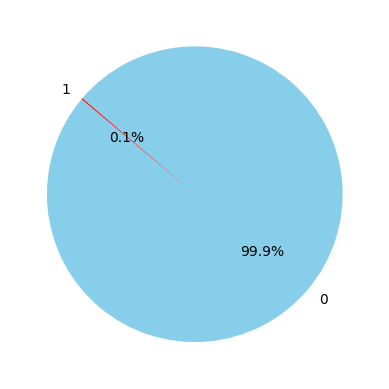

In [ ]:
category_counts=data['isFraud'].value_counts()
custom_colors = [ 'skyblue', 'red']
#plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,colors=custom_colors)

Text(0.5, 1.0, 'Percentage of different type payment methode')

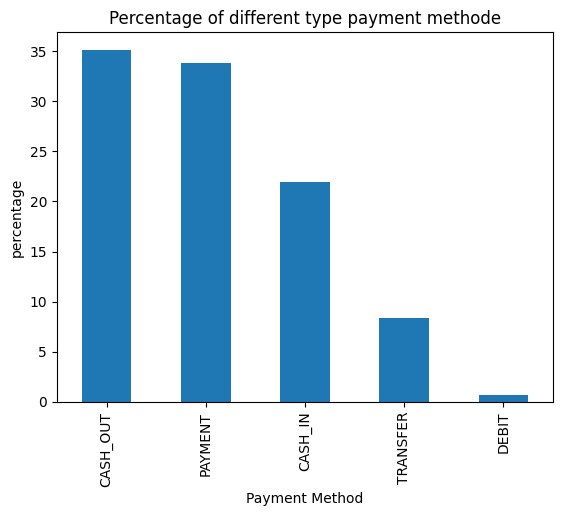

In [ ]:
payment_count=data['type'].value_counts()
payment_per=(payment_count/payment_count.sum())*100
payment_per.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('percentage')
plt.title('Percentage of different type payment methode')

type
TRANSFER    51.777434
CASH_OUT    48.222566
Name: count, dtype: float64


Text(0.5, 1.0, 'Percentage of different type payment methode')

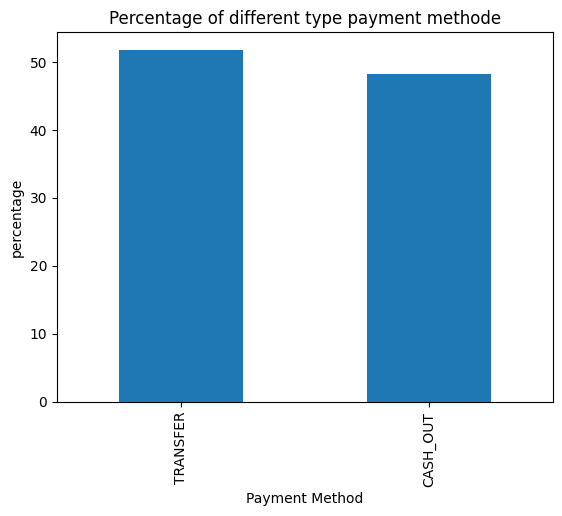

In [ ]:
fraud_data=data[data['isFraud']==1]
real_data=data[data['isFraud']==0]
payment_count_fraud=fraud_data['type'].value_counts()
payment_per_fraud=(payment_count_fraud/payment_count_fraud.sum())*100
print(payment_per_fraud)
payment_per_fraud.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('percentage')
plt.title('Percentage of different type payment methode')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


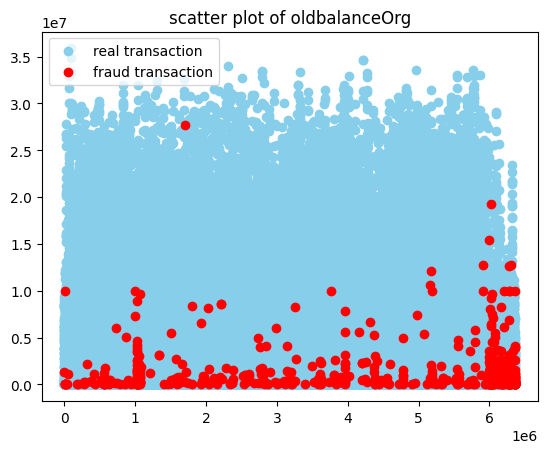

In [ ]:
plt.scatter(real_data.index, real_data['oldbalanceOrg'], color='skyblue', label='real transaction')
plt.scatter(fraud_data.index, fraud_data['oldbalanceOrg'], color='red', label='fraud transaction')
plt.title('scatter plot of oldbalanceOrg')
plt.legend()
plt.show()


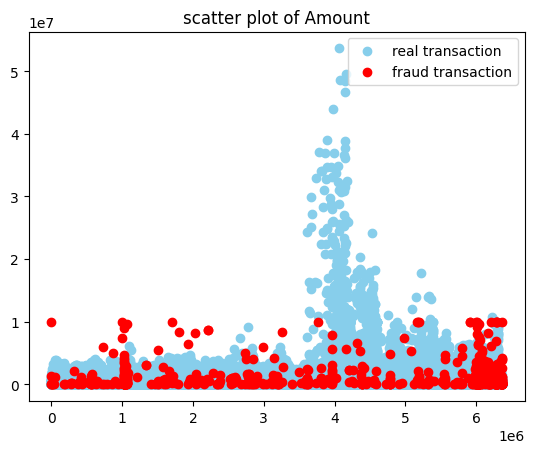

In [ ]:
plt.scatter(real_data.index, real_data['amount'], color='skyblue', label='real transaction')
plt.scatter(fraud_data.index, fraud_data['amount'], color='red', label='fraud transaction')
plt.title('scatter plot of Amount')
plt.legend()
plt.show()


## 3. Label Encoding(convert category to numerical value)

In [ ]:
categorical_column=data.select_dtypes(include="object").columns
print(categorical_column)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in categorical_column:
  data[i]= encoder.fit_transform( data[i].astype(str))
print(data.info())
data.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3737323 to 3264458
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  int64  
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  int64  
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  int64  
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 45.8 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,0,330218.42,405008,20866.00,351084.42,190812,452419.57,122201.15,0,0
264914,15,3,11647.08,68425,30370.00,18722.92,308892,0.00,0.00,0,0
85647,10,0,152264.21,193637,106589.00,258853.21,65434,201303.01,49038.80,0,0
5899326,403,4,1551760.63,327567,0.00,0.00,60792,3198359.45,4750120.08,0,0
2544263,206,0,78172.30,451995,2921331.58,2999503.88,9923,415821.90,337649.60,0,0
3494160,259,3,915.13,259755,0.00,0.00,315412,0.00,0.00,0,0
2331654,188,1,20603.87,452088,0.00,0.00,189499,558068.66,578672.53,0,0
1414955,139,1,58605.72,220561,0.00,0.00,167248,585494.94,644100.66,0,0
2938135,230,3,4865.11,470715,0.00,0.00,344561,0.00,0.00,0,0
6133806,544,1,118131.63,342467,0.00,0.00,140241,8131691.35,8476246.86,0,0


categorical_column=data.select_dtypes(include="object").columns
print(categorical_column)

## 4. Check Multicollinearty and Remove



<Axes: >

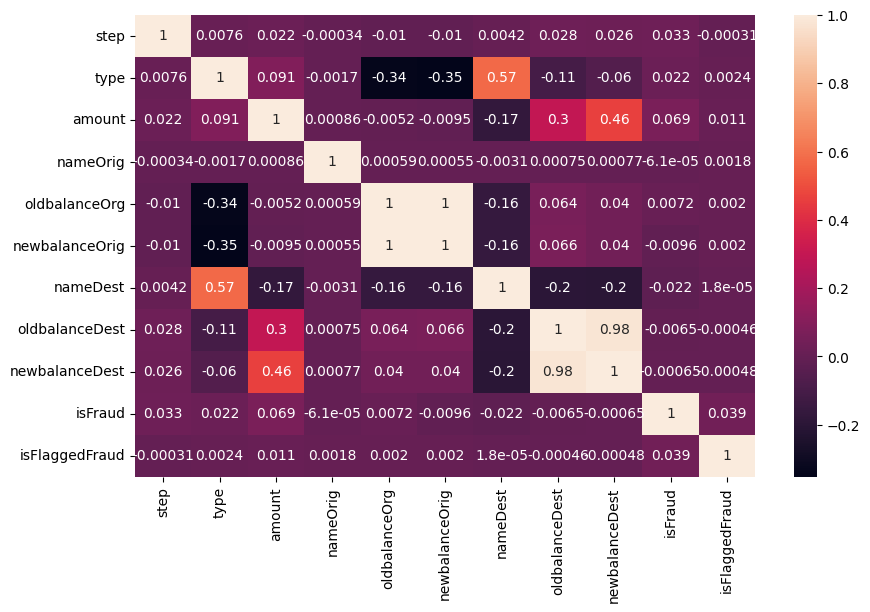

In [ ]:
#cheak Multicollinearty
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
!pip install statsmodels

In [ ]:
# check VIF(variance_inflation_factor) & drop the colum which high VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif_data)
high_vif_variables = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
print("Variables with high VIF values:")
print(high_vif_variables)
# Remove variables with high VIF values from the dataset
data_filtered = data.drop(columns=high_vif_variables)
print("Filtered dataset:")
print(data_filtered)

          Variable         VIF
0             step    2.916362
1             type    4.833131
2           amount    4.197777
3         nameOrig    2.883667
4    oldbalanceOrg  623.533014
5   newbalanceOrig  630.623195
6         nameDest    5.163556
7   oldbalanceDest   72.861631
8   newbalanceDest   84.710653
9          isFraud    1.177426
10  isFlaggedFraud    1.002071
Variables with high VIF values:
['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Filtered dataset:
         step  type      amount  nameOrig  nameDest  isFraud  isFlaggedFraud
3737323   278     0   330218.42    405008    190812        0               0
264914     15     3    11647.08     68425    308892        0               0
85647      10     0   152264.21    193637     65434        0               0
5899326   403     4  1551760.63    327567     60792        0               0
2544263   206     0    78172.30    451995      9923        0               0
...       ...   ...         ...       ...   

<Axes: >

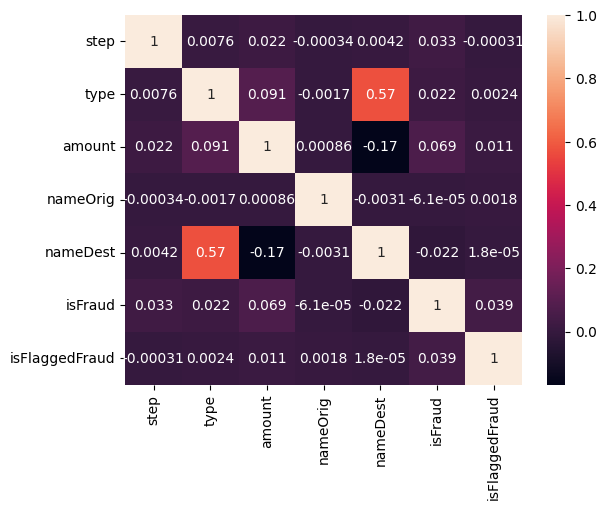

In [ ]:
# drop which colum high VIF value
import seaborn as sns
corr=data_filtered.corr()
plt.figure()
sns.heatmap(corr,annot=True)

In [ ]:
new_data=data_filtered
new_data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
3737323,278,0,330218.42,405008,190812,0,0
264914,15,3,11647.08,68425,308892,0,0
85647,10,0,152264.21,193637,65434,0,0
5899326,403,4,1551760.63,327567,60792,0,0
2544263,206,0,78172.30,451995,9923,0,0


## 5. Run model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split the dataset into features (X) and target (y)
X = new_data.drop(columns=['isFraud'])
y = new_data['isFraud']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import ComplementNB, GaussianNB, BernoulliNB


from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


####ComplementNB & GaussianNB

In [ ]:

# Initialize models
models = {
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),


}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Cross-validate models (optional)
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print evaluation results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Print cross-validation results (optional)
print("Cross-Validation Results:")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy: {score}")


Evaluation Results:
Model: ComplementNB
Accuracy: 0.87626
Precision: 0.998206103574974
Recall: 0.87626
F1-score: 0.9328943990756517

Model: GaussianNB
Accuracy: 0.9946333333333334
Precision: 0.9978821968751042
Recall: 0.9946333333333334
F1-score: 0.9962055355655404

Cross-Validation Results:
Model: ComplementNB, Mean Accuracy: 0.8811160000000001
Model: GaussianNB, Mean Accuracy: 0.994436


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_before_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


####BaggingClassifier & AdaBoostClassifier

In [ ]:

# Initialize models
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)

}
# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Cross-validate models (optional)
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print evaluation results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Print cross-validation results (optional)
print("Cross-Validation Results:")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Evaluation Results:
Model: Bagging
Accuracy: 0.9990533333333333
Precision: 0.9989138194584666
Recall: 0.9990533333333333
F1-score: 0.9988108929218299

Model: AdaBoost
Accuracy: 0.9988333333333334
Precision: 0.9985273526119188
Recall: 0.9988333333333334
F1-score: 0.9983175190473361

Cross-Validation Results:
Model: Bagging, Mean Accuracy: 0.9989039999999999
Model: AdaBoost, Mean Accuracy: 0.998724


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_before_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


#### xgboost

In [ ]:


# Initialize models
models = {
    "XGBoost": xgb.XGBClassifier(random_state=42)

}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Cross-validate models (optional)
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print evaluation results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Print cross-validation results (optional)
print("Cross-Validation Results:")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy: {score}")

Evaluation Results:
Model: XGBoost
Accuracy: 0.9989933333333333
Precision: 0.9988586195999264
Recall: 0.9989933333333333
F1-score: 0.9986769905474407

Cross-Validation Results:
Model: XGBoost, Mean Accuracy: 0.998826


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_before_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


####GradientBoosting

In [ ]:


# Initialize models
models = {
   "GradientBoosting": GradientBoostingClassifier(random_state=42)

}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Cross-validate models (optional)
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print evaluation results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Print cross-validation results (optional)
print("Cross-Validation Results:")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy: {score}")

Evaluation Results:
Model: GradientBoosting
Accuracy: 0.9987933333333333
Precision: 0.998248425802101
Recall: 0.9987933333333333
F1-score: 0.9983270318859933

Cross-Validation Results:
Model: GradientBoosting, Mean Accuracy: 0.9987920000000001


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_before_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


####MLPClassifier

In [ ]:

# Initialize models
models = {
    "MLPClassifier": MLPClassifier(random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print evaluation results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Print cross-validation results
print("Cross-Validation Results:")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Results:
Model: MLPClassifier
Accuracy: 0.9988
Precision: 0.9976014400000001
Recall: 0.9988
F1-score: 0.9982003602161297

Cross-Validation Results:
Model: MLPClassifier, Mean Accuracy: 0.9983000000000001


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_before_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")


Models saved successfully!



####comparative Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


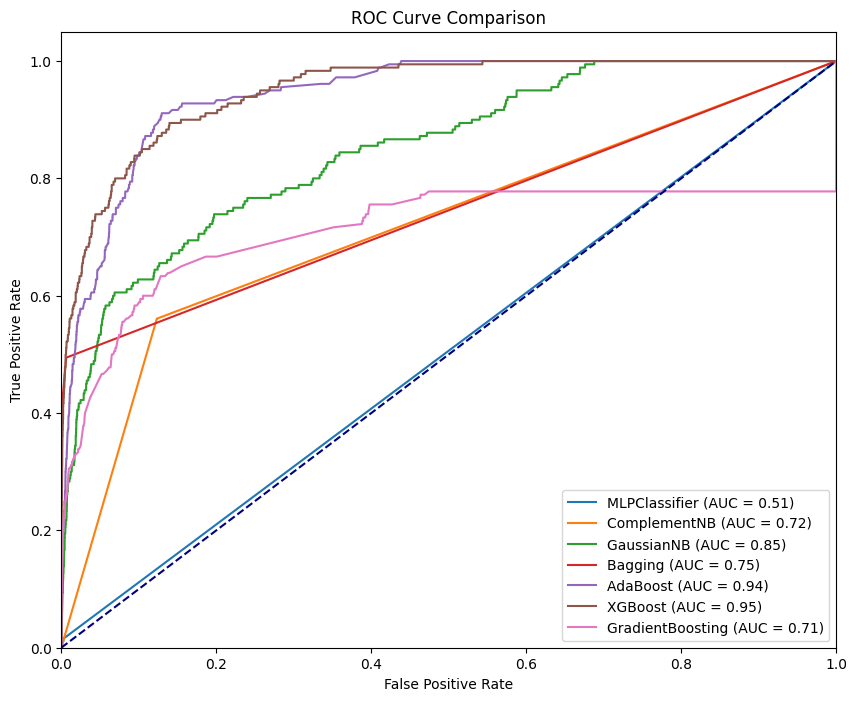

In [ ]:
models = {
    "MLPClassifier": MLPClassifier(random_state=42),
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    # Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


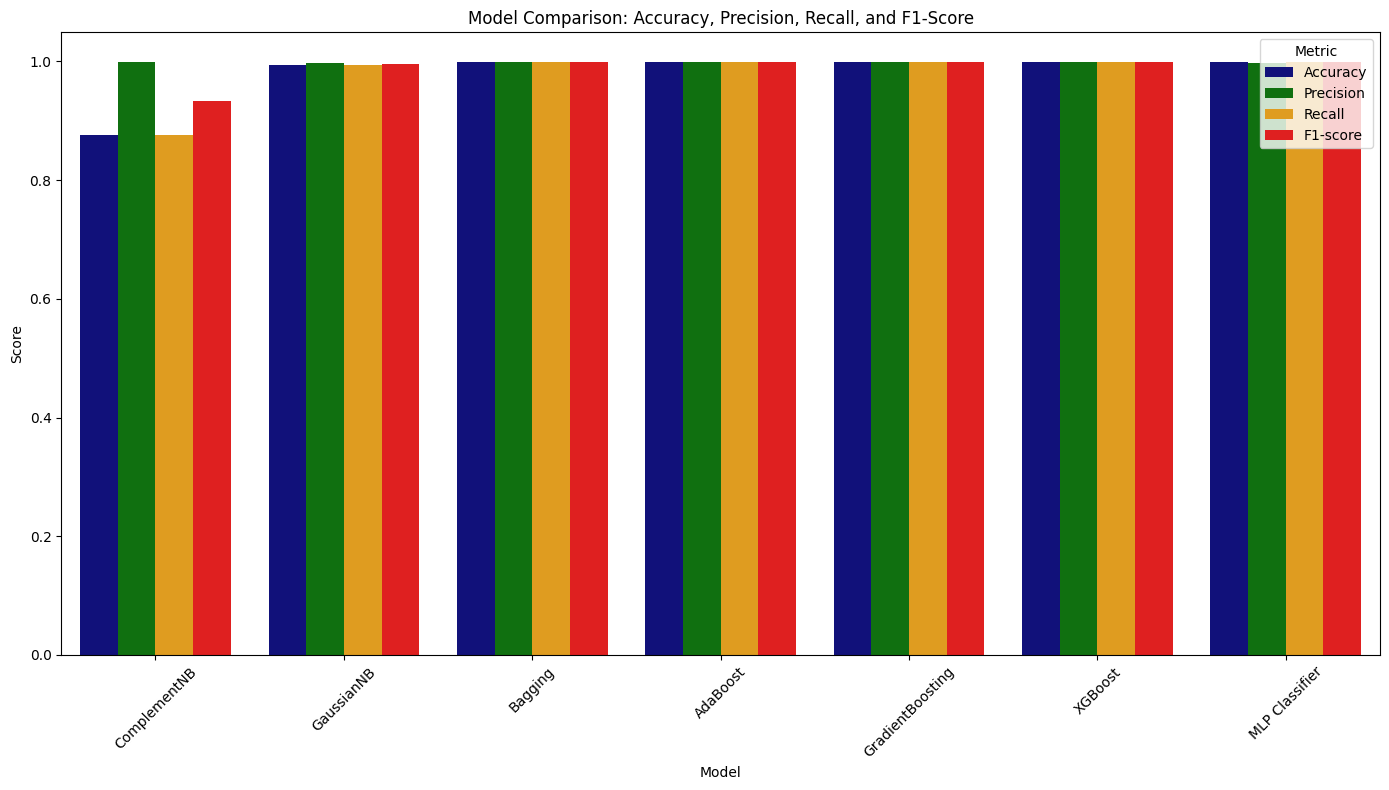

In [ ]:
# Install the necessary package
!pip install xgboost

# Initialize models
models = {
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(), # Use xgb.XGBClassifier() to access the class
    "MLP Classifier": MLPClassifier(max_iter=1000)
}


# Evaluate each model
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Evaluate models and gather metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-score"].append(f1)

# Convert results into a DataFrame for easier visualization
df_results = pd.DataFrame(results)

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Reshape DataFrame for grouped bar plot
df_long = pd.melt(df_results, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                  var_name='Metric', value_name='Score')
# Define the custom color palette for the metrics
metric_colors = {
    'Accuracy': 'darkblue',
    'Precision': 'green',
    'Recall': 'orange',
    'F1-score': 'red'
}
# Plot grouped bar chart using seaborn
sns.barplot(x="Model", y="Score", hue="Metric", data=df_long, palette=metric_colors)

# Set plot labels and title
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1-Score')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Model')

# Show plot
plt.tight_layout()
plt.show()

Model: MLPClassifier
True Positives (TP): 0
True Negatives (TN): 149820
False Positives (FP): 0
False Negatives (FN): 180



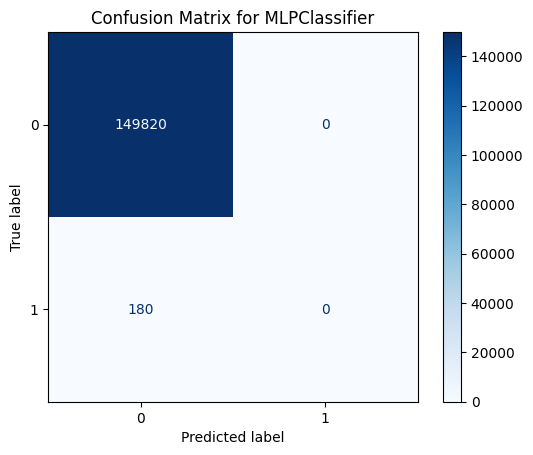

Model: ComplementNB
True Positives (TP): 101
True Negatives (TN): 131338
False Positives (FP): 18482
False Negatives (FN): 79



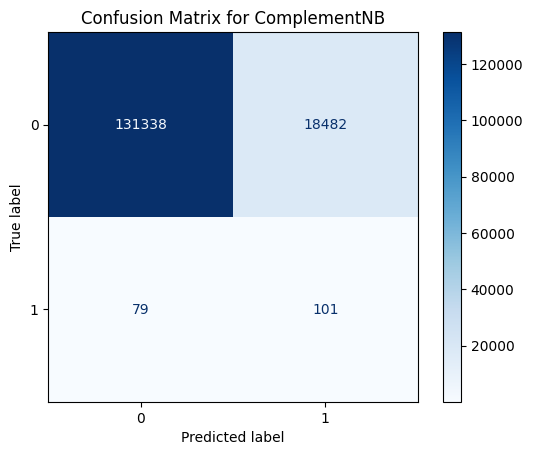

Model: BernoulliNB
True Positives (TP): 0
True Negatives (TN): 149820
False Positives (FP): 0
False Negatives (FN): 180



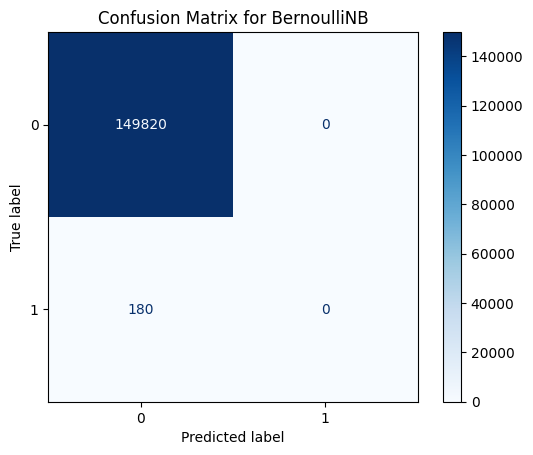

Model: Bagging
True Positives (TP): 48
True Negatives (TN): 149810
False Positives (FP): 10
False Negatives (FN): 132



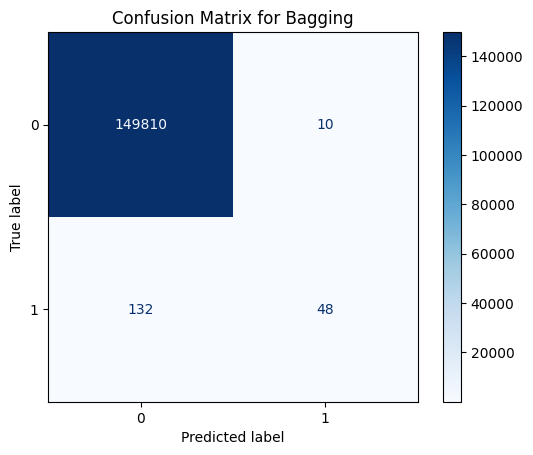

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
True Positives (TP): 8
True Negatives (TN): 149817
False Positives (FP): 3
False Negatives (FN): 172



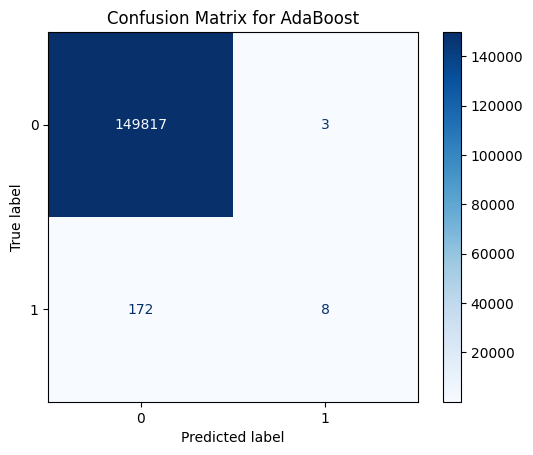

Model: XGBoost
True Positives (TP): 35
True Negatives (TN): 149814
False Positives (FP): 6
False Negatives (FN): 145



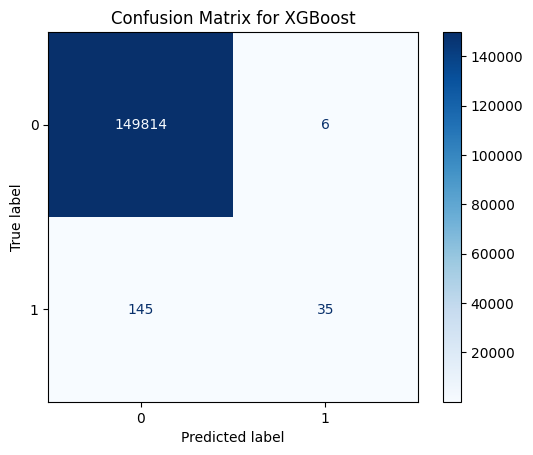

Model: GradientBoosting
True Positives (TP): 11
True Negatives (TN): 149808
False Positives (FP): 12
False Negatives (FN): 169



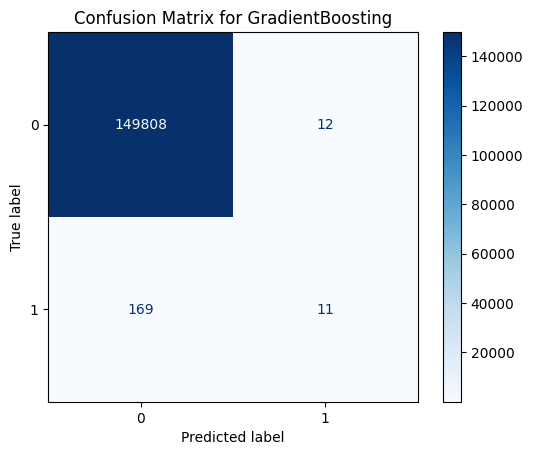

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize models
models = {
    "MLPClassifier": MLPClassifier(random_state=42),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store TP, TN, FP, FN for each model
model_results = {}

# Plot Confusion Matrix for each model and count TP, TN, FP, FN
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, TN, FP, FN
    if cm.shape == (2, 2):  # Ensure it's a binary classification confusion matrix
        TN, FP, FN, TP = cm.ravel()
        model_results[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

        # Print TP, TN, FP, FN
        print(f"Model: {name}")
        print(f"True Positives (TP): {TP}")
        print(f"True Negatives (TN): {TN}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print()

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

Model: GaussianNB
True Positives (TP): 34
True Negatives (TN): 149161
False Positives (FP): 659
False Negatives (FN): 146



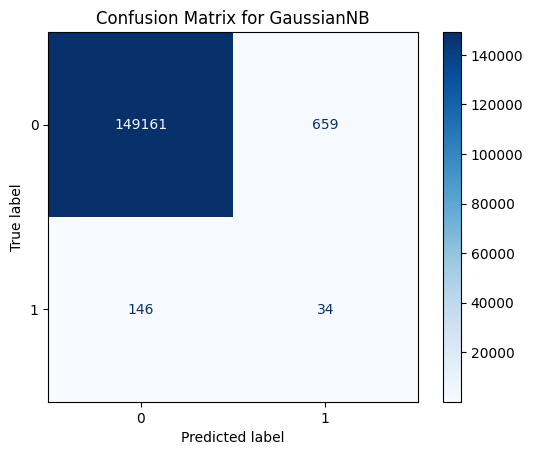

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize models
models = {

    "GaussianNB": GaussianNB(),

}

# Dictionary to store TP, TN, FP, FN for each model
model_results = {}

# Plot Confusion Matrix for each model and count TP, TN, FP, FN
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, TN, FP, FN
    if cm.shape == (2, 2):  # Ensure it's a binary classification confusion matrix
        TN, FP, FN, TP = cm.ravel()
        model_results[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

        # Print TP, TN, FP, FN
        print(f"Model: {name}")
        print(f"True Positives (TP): {TP}")
        print(f"True Negatives (TN): {TN}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print()

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

## 6.  Sampling

####Over-Sampling

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
# Separate features (X) and target (y)
X = new_data.drop(columns=['isFraud'])
y = new_data['isFraud']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import ComplementNB, GaussianNB, BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize models
models = {
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),
}

# Evaluate each model on the resampled data
results = {}
for name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred_resampled = model.predict(X_test_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')

    # Store the results for each model
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print evaluation results for each model
print("Evaluation Results (After SMOTE):")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Optional: Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Results (After SMOTE):")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy (5-Fold CV): {score}")

Evaluation Results (After SMOTE):
Model: ComplementNB
Accuracy: 0.709520980468072
Precision: 0.7377668795352091
Recall: 0.709520980468072
F1-score: 0.700632643988077

Model: GaussianNB
Accuracy: 0.7396933367154853
Precision: 0.7935250644739339
Recall: 0.7396933367154853
F1-score: 0.7271876134932366

Cross-Validation Results (After SMOTE):
Model: ComplementNB, Mean Accuracy (5-Fold CV): 0.7098114968788357
Model: GaussianNB, Mean Accuracy (5-Fold CV): 0.7415005020892369


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_after_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
# Initialize models
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)

}
# Evaluate each model on the resampled data
results = {}
for name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred_resampled = model.predict(X_test_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')

    # Store the results for each model
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print evaluation results for each model
print("Evaluation Results (After SMOTE):")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Optional: Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Results (After SMOTE):")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy (5-Fold CV): {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Results (After SMOTE):
Model: Bagging
Accuracy: 0.9952505240110543
Precision: 0.9952682008663004
Recall: 0.9952505240110543
F1-score: 0.9952504811559194

Model: AdaBoost
Accuracy: 0.887007195973459
Precision: 0.8870528660172002
Recall: 0.887007195973459
F1-score: 0.8870038392647321



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Results (After SMOTE):
Model: Bagging, Mean Accuracy (5-Fold CV): 0.9958195906654531
Model: AdaBoost, Mean Accuracy (5-Fold CV): 0.8837856200998905


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_after_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
# Initialize models
models = {
    "XGBoost": xgb.XGBClassifier(random_state=42)

}

# Evaluate each model on the resampled data
results = {}
for name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred_resampled = model.predict(X_test_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')

    # Store the results for each model
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print evaluation results for each model
print("Evaluation Results (After SMOTE):")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Optional: Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Results (After SMOTE):")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy (5-Fold CV): {score}")

Evaluation Results (After SMOTE):
Model: XGBoost
Accuracy: 0.9718502596691722
Precision: 0.9719391411331566
Recall: 0.9718502596691722
F1-score: 0.9718489275899198

Cross-Validation Results (After SMOTE):
Model: XGBoost, Mean Accuracy (5-Fold CV): 0.9712788352191835


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_after_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
# Initialize models
models = {
    "MLPClassifier": MLPClassifier(random_state=42)
}
# Evaluate each model on the resampled data
results = {}
for name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred_resampled = model.predict(X_test_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')

    # Store the results for each model
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print evaluation results for each model
print("Evaluation Results (After SMOTE):")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Optional: Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Results (After SMOTE):")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy (5-Fold CV): {score}")

Evaluation Results (After SMOTE):
Model: MLPClassifier
Accuracy: 0.733652190165948
Precision: 0.7399514397302902
Recall: 0.733652190165948
F1-score: 0.7318914683384437

Cross-Validation Results (After SMOTE):
Model: MLPClassifier, Mean Accuracy (5-Fold CV): 0.6560328400709224


In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_after_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Initialize models
models = {

    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate each model on the resampled data
results = {}
for name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred_resampled = model.predict(X_test_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')

    # Store the results for each model
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Print evaluation results for each model
print("Evaluation Results (After SMOTE):")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Optional: Cross-validate models
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Results (After SMOTE):")
for name, score in cv_results.items():
    print(f"Model: {name}, Mean Accuracy (5-Fold CV): {score}")

In [ ]:
import pickle

# Save each model
for name, model in models.items():
    with open(f'{name}_after_balancing_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for ROC curve (use only probabilities for positive class)
    y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    "ComplementNB": ComplementNB(),
    "GaussianNB": GaussianNB(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Results dictionary to store evaluation metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Train and evaluate each model using resampled data
for name, model in models.items():
    # Train the model on resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict using the test portion of the resampled data
    y_pred = model.predict(X_test_resampled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_resampled, y_pred)
    precision = precision_score(y_test_resampled, y_pred, average='weighted')
    recall = recall_score(y_test_resampled, y_pred, average='weighted')
    f1 = f1_score(y_test_resampled, y_pred, average='weighted')

    # Append the results to the dictionary
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-score"].append(f1)

# Convert results into a DataFrame for better visualization
df_results = pd.DataFrame(results)

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Reshape DataFrame for grouped bar plot
df_long = pd.melt(df_results, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                  var_name='Metric', value_name='Score')

# Define the custom color palette for the metrics
metric_colors = {
    'Accuracy': 'darkblue',
    'Precision': 'green',
    'Recall': 'orange',
    'F1-score': 'red'
}

# Plot grouped bar chart using seaborn
sns.barplot(x="Model", y="Score", hue="Metric", data=df_long, palette=metric_colors)

# Set plot labels and title
plt.title('Model Comparison on Resampled Data: Accuracy, Precision, Recall, and F1-Score')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Model')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize models
models = {
    "MLPClassifier": MLPClassifier(random_state=42),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store TP, TN, FP, FN for each model
model_results = {}

# Plot Confusion Matrix for each model and count TP, TN, FP, FN
for name, model in models.items():
    # Train the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the resampled test set
    y_pred_resampled = model.predict(X_test_resampled)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test_resampled, y_pred_resampled)

    # Extract TP, TN, FP, FN
    if cm.shape == (2, 2):  # Ensure it's a binary classification confusion matrix
        TN, FP, FN, TP = cm.ravel()
        model_results[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

        # Print TP, TN, FP, FN
        print(f"Model: {name}")
        print(f"True Positives (TP): {TP}")
        print(f"True Negatives (TN): {TN}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print()

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize models
models = {

    "GaussianNB": GaussianNB(),

}

# Dictionary to store TP, TN, FP, FN for each model
model_results = {}

# Plot Confusion Matrix for each model and count TP, TN, FP, FN
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, TN, FP, FN
    if cm.shape == (2, 2):  # Ensure it's a binary classification confusion matrix
        TN, FP, FN, TP = cm.ravel()
        model_results[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

        # Print TP, TN, FP, FN
        print(f"Model: {name}")
        print(f"True Positives (TP): {TP}")
        print(f"True Negatives (TN): {TN}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print()

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Interface

In [ ]:
import pickle
import pandas as pd
import gradio as gr

# Define file paths for saved models
model_files_before = [
    "MLPClassifier_before_balancing_model.pkl",
    "ComplementNB_before_balancing_model.pkl",
    "GaussianNB_before_balancing_model.pkl",
    "Bagging_before_balancing_model.pkl",
    "AdaBoost_before_balancing_model.pkl",
    "XGBoost_before_balancing_model.pkl",
    "GradientBoosting_before_balancing_model.pkl"
]

model_files_after = [
    "MLPClassifier_after_balancing_model.pkl",
    "ComplementNB_after_balancing_model.pkl",
    "GaussianNB_after_balancing_model.pkl",
    "Bagging_after_balancing_model.pkl",
    "AdaBoost_after_balancing_model.pkl",
    "XGBoost_after_balancing_model.pkl",
    "GradientBoosting_after_balancing_model.pkl"
]

# Load all models
models_before = {
    file.split("_before_balancing_model.pkl")[0]: pickle.load(open(file, 'rb'))
    for file in model_files_before
}

models_after = {
    file.split("_after_balancing_model.pkl")[0]: pickle.load(open(file, 'rb'))
    for file in model_files_after
}

# Define the prediction function
def predict_fraud(balance_option, selected_model, *features):
    # Select models based on balancing option
    model_dict = models_before if balance_option == "Before Balancing" else models_after
    model = model_dict[selected_model]

    # Define feature names (update this list based on your dataset)
    feature_names = ["step", "type", "amount", "nameOrig", "nameDest", "isFlaggedFraud"]

    # Create input DataFrame
    input_data = pd.DataFrame([features], columns=feature_names)

    # Make prediction
    prediction = model.predict(input_data)[0]
    return "Fraud" if prediction == 1 else "Not Fraud"

# Define Gradio interface inputs
feature_names = ["step", "type", "amount", "nameOrig", "nameDest", "isFlaggedFraud"]  # Update as needed
feature_inputs = [gr.Number(label=feature) for feature in feature_names]
interface_inputs = [
    gr.Radio(choices=["Before Balancing", "After Balancing"], label="Balancing Option"),
    gr.Dropdown(choices=list(models_before.keys()), label="Select Model")
] + feature_inputs

# Define Gradio interface
gr_interface = gr.Interface(
    fn=predict_fraud,
    inputs=interface_inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="Fraud Detection Model",
    description="Select balancing option, model, and provide transaction details to predict fraud."
)

# Launch Gradio app
gr_interface.launch(share=True)